 ### Задание 1. 
 
Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
plt.rcParams['figure.figsize'] = (15, 7)

In [32]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [33]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [34]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [40]:
X_st = X.copy().astype(np.float64)

In [43]:
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [45]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [46]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [64]:
lmbda = 1e-5
weights = []

for i in range(10):
    weights.append(eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=lmbda))
    lmbda *=10
weights = np.array(weights)

100 [49.85333957  3.66667865  3.48290435  4.4626784 ] 100.15594962739058
200 [56.39892652  4.16740857  3.16668405  4.31346538] 41.5224580191275
300 [57.2669905   4.55528946  2.89028645  4.20487159] 40.256968368459134
400 [57.38211158  4.86305524  2.65692754  4.13289746] 40.0833917570374
500 [57.39737873  5.10791641  2.46015844  4.08691915] 39.98155930300687
600 [57.39940343  5.30323839  2.29441146  4.05917151] 39.914700625597746
700 [57.39967195  5.45944584  2.15492217  4.04402625] 39.870315740474354
800 [57.39970756  5.584689    2.03762531  4.03742879] 39.840633330352574
900 [57.39971228  5.68535553  1.93906078  4.03647983] 39.82065515414864
1000 [57.39971291  5.7664642   1.85628994  4.03912497] 39.807132690842984
100 [49.85179222  3.6666544   3.48286113  4.46256   ] 100.17955368352575
200 [56.39657288  4.16736645  3.16668449  4.31331684] 41.52726306452611
300 [57.26445022  4.55519765  2.89034917  4.20470966] 40.257697089017675
400 [57.37953599  4.86289501  2.65706344  4.13272988] 40.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':


Text(0.5, 1.0, 'W3')

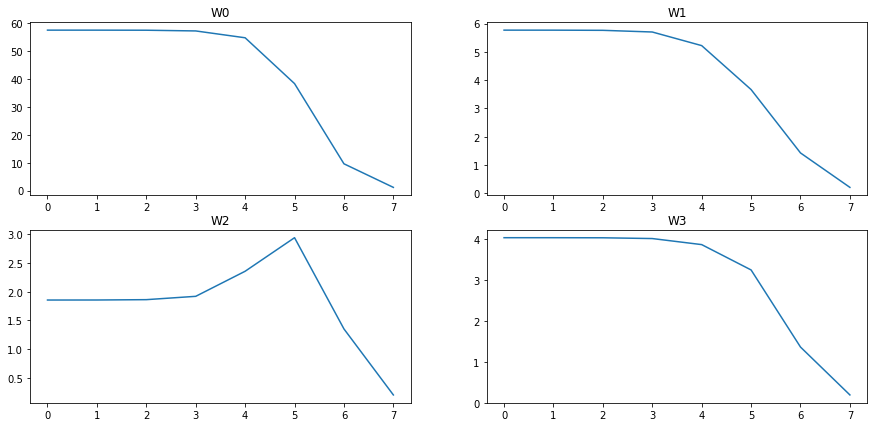

In [69]:
fig = plt.figure() 
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)

ax1.plot(weights[:, 0])
ax1.set_title('W0')

ax2.plot(weights[:, 1])
ax2.set_title('W1')

ax3.plot(weights[:, 2])
ax3.set_title('W2')

ax4.plot(weights[:, 3])
ax4.set_title('W3')


### Задание 2
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно. Нормализация меняет масштаб с сохранением отношений между матожиданием и дисперсией, стандартизация же работает с отношениями между дисперсией и матожиданием, поэтому должен получится тот же результат что и без нормализации. 

### Задание 3

Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [5]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W